In [23]:
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from queue import SimpleQueue

In [51]:
def random_adjacency_matrix(n_vertices, n_edges):
    assert(n_edges <= n_vertices*(n_vertices-1)/2), "Too much edges requested"
    A = np.zeros((n_vertices, n_vertices), dtype=np.int)
    pairs = [(i, j) for j in range(n_vertices) for i in range(j)]
    indices = np.random.choice(range(len(pairs)), size=n_edges, replace=False)

    for index in indices:
        i, j = pairs[index]
        A[i, j] = A[j, i] = 1
    return A

In [52]:
def adjacency_matrix_to_list(adj_matrix):
    N = adj_matrix.shape[0]
    
    adj_list = [[] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            if adj_matrix[i, j] == 1:
                adj_list[i].append(j)
    return adj_list

In [53]:
adj_matrix = random_adjacency_matrix(100, 200)
adj_list = adjacency_matrix_to_list(adj_matrix)

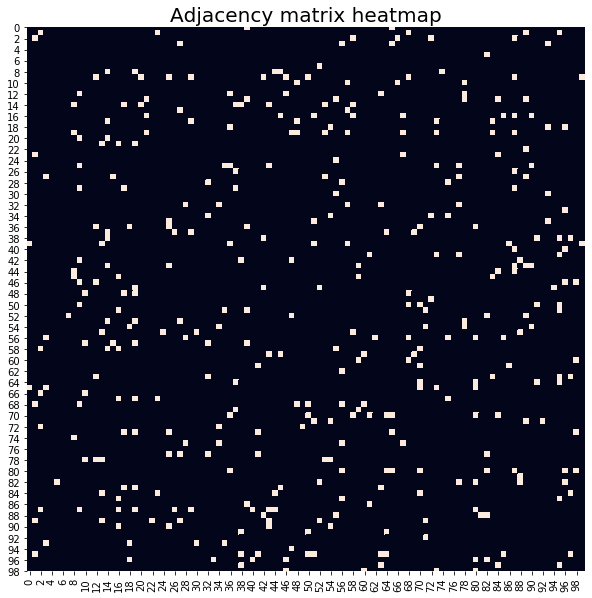

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(adj_matrix, cbar=False)
plt.title('Adjacency matrix heatmap', fontsize=20)
plt.savefig('adj5.png')

In [55]:
print('Adjacency list (first 3 vertices)\n----------------------------------\n')
for i in range(3):
    print(f"{i}: ", end='')
    print(adj_list[i])
    print()

Adjacency list (first 3 vertices)
----------------------------------

0: [39, 65]

1: [2, 23, 68, 89, 95]

2: [1, 58, 66, 72, 87]



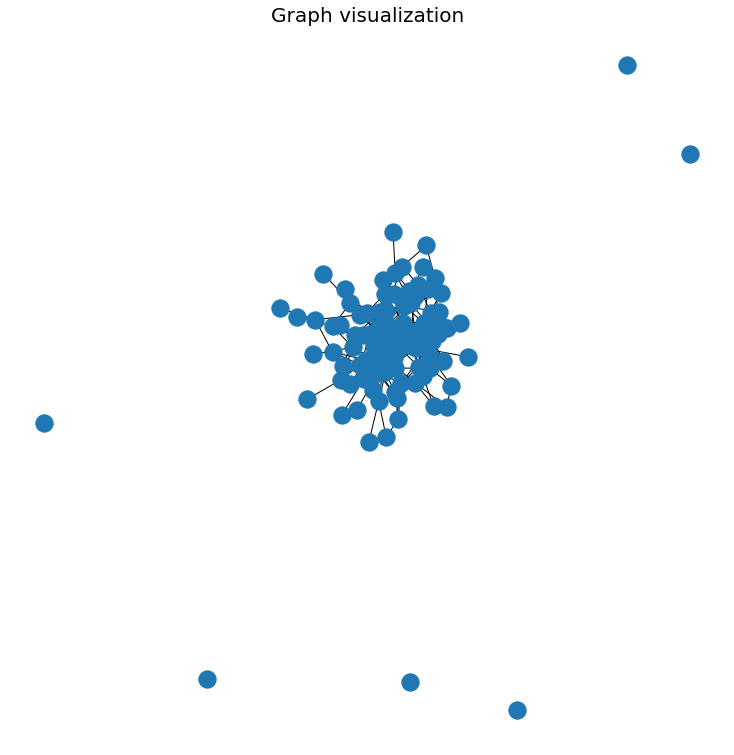

In [56]:
graph = nx.from_numpy_matrix(adj_matrix)
plt.figure(figsize=(10, 10))
nx.draw(graph)
plt.title('Graph visualization', fontsize=20)
plt.savefig('graph5.png')

In [57]:
class ConnectedComponentsFinder:
    def __init__(self, adj_list):
        self._adj_list = adj_list
        self._visited = [False for _ in adj_list]
        self._component_ids = [None for _ in adj_list]

    def traverse_from(self, node, component_id):
        if self._visited[node]:
            return
        self._visited[node] = True
        self._component_ids[node] = component_id
        for neighbor in self._adj_list[node]:
            self.traverse_from(neighbor, component_id)

    def compute_components(self):
        n_vertices = len(self._adj_list)
        n_components = 1
        for node in range(n_vertices):
            if not self._visited[node]:
                self.traverse_from(node, n_components-1)
                n_components += 1
        return self._component_ids

In [58]:
class PathFinder:
    def __init__(self, adj_list):
        self._adj_list = adj_list
    
    def shortest_path(self, s, t):
        queue = SimpleQueue()
        queue.put((s, 0))
        
        while not queue.empty():
            v, dist = queue.get()
            if v == t:
                return dist
            for u in self._adj_list[v]:
                queue.put((u, dist+1))
        raise Exception(f'{t} is unreachable from {s}')

In [59]:
connected_components = ConnectedComponentsFinder(adj_list).compute_components()

i, j = np.random.choice(range(100), size=2, replace=False)
shortest_path = PathFinder(adj_list).shortest_path(i, j)

print(f'Number of connected components: {len(set(connected_components))}')
print(f'Shortest path between {i} and {j} has length {shortest_path}')

Number of connected components: 7
Shortest path between 14 and 21 has length 3
